In [1]:
!pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 6.4 MB/s eta 0:00:0000:0100:01
    PyYAML (>=5.1.*)
            ~~~~~~^


In [2]:
!pip install matplotlib

    PyYAML (>=5.1.*)
            ~~~~~~^


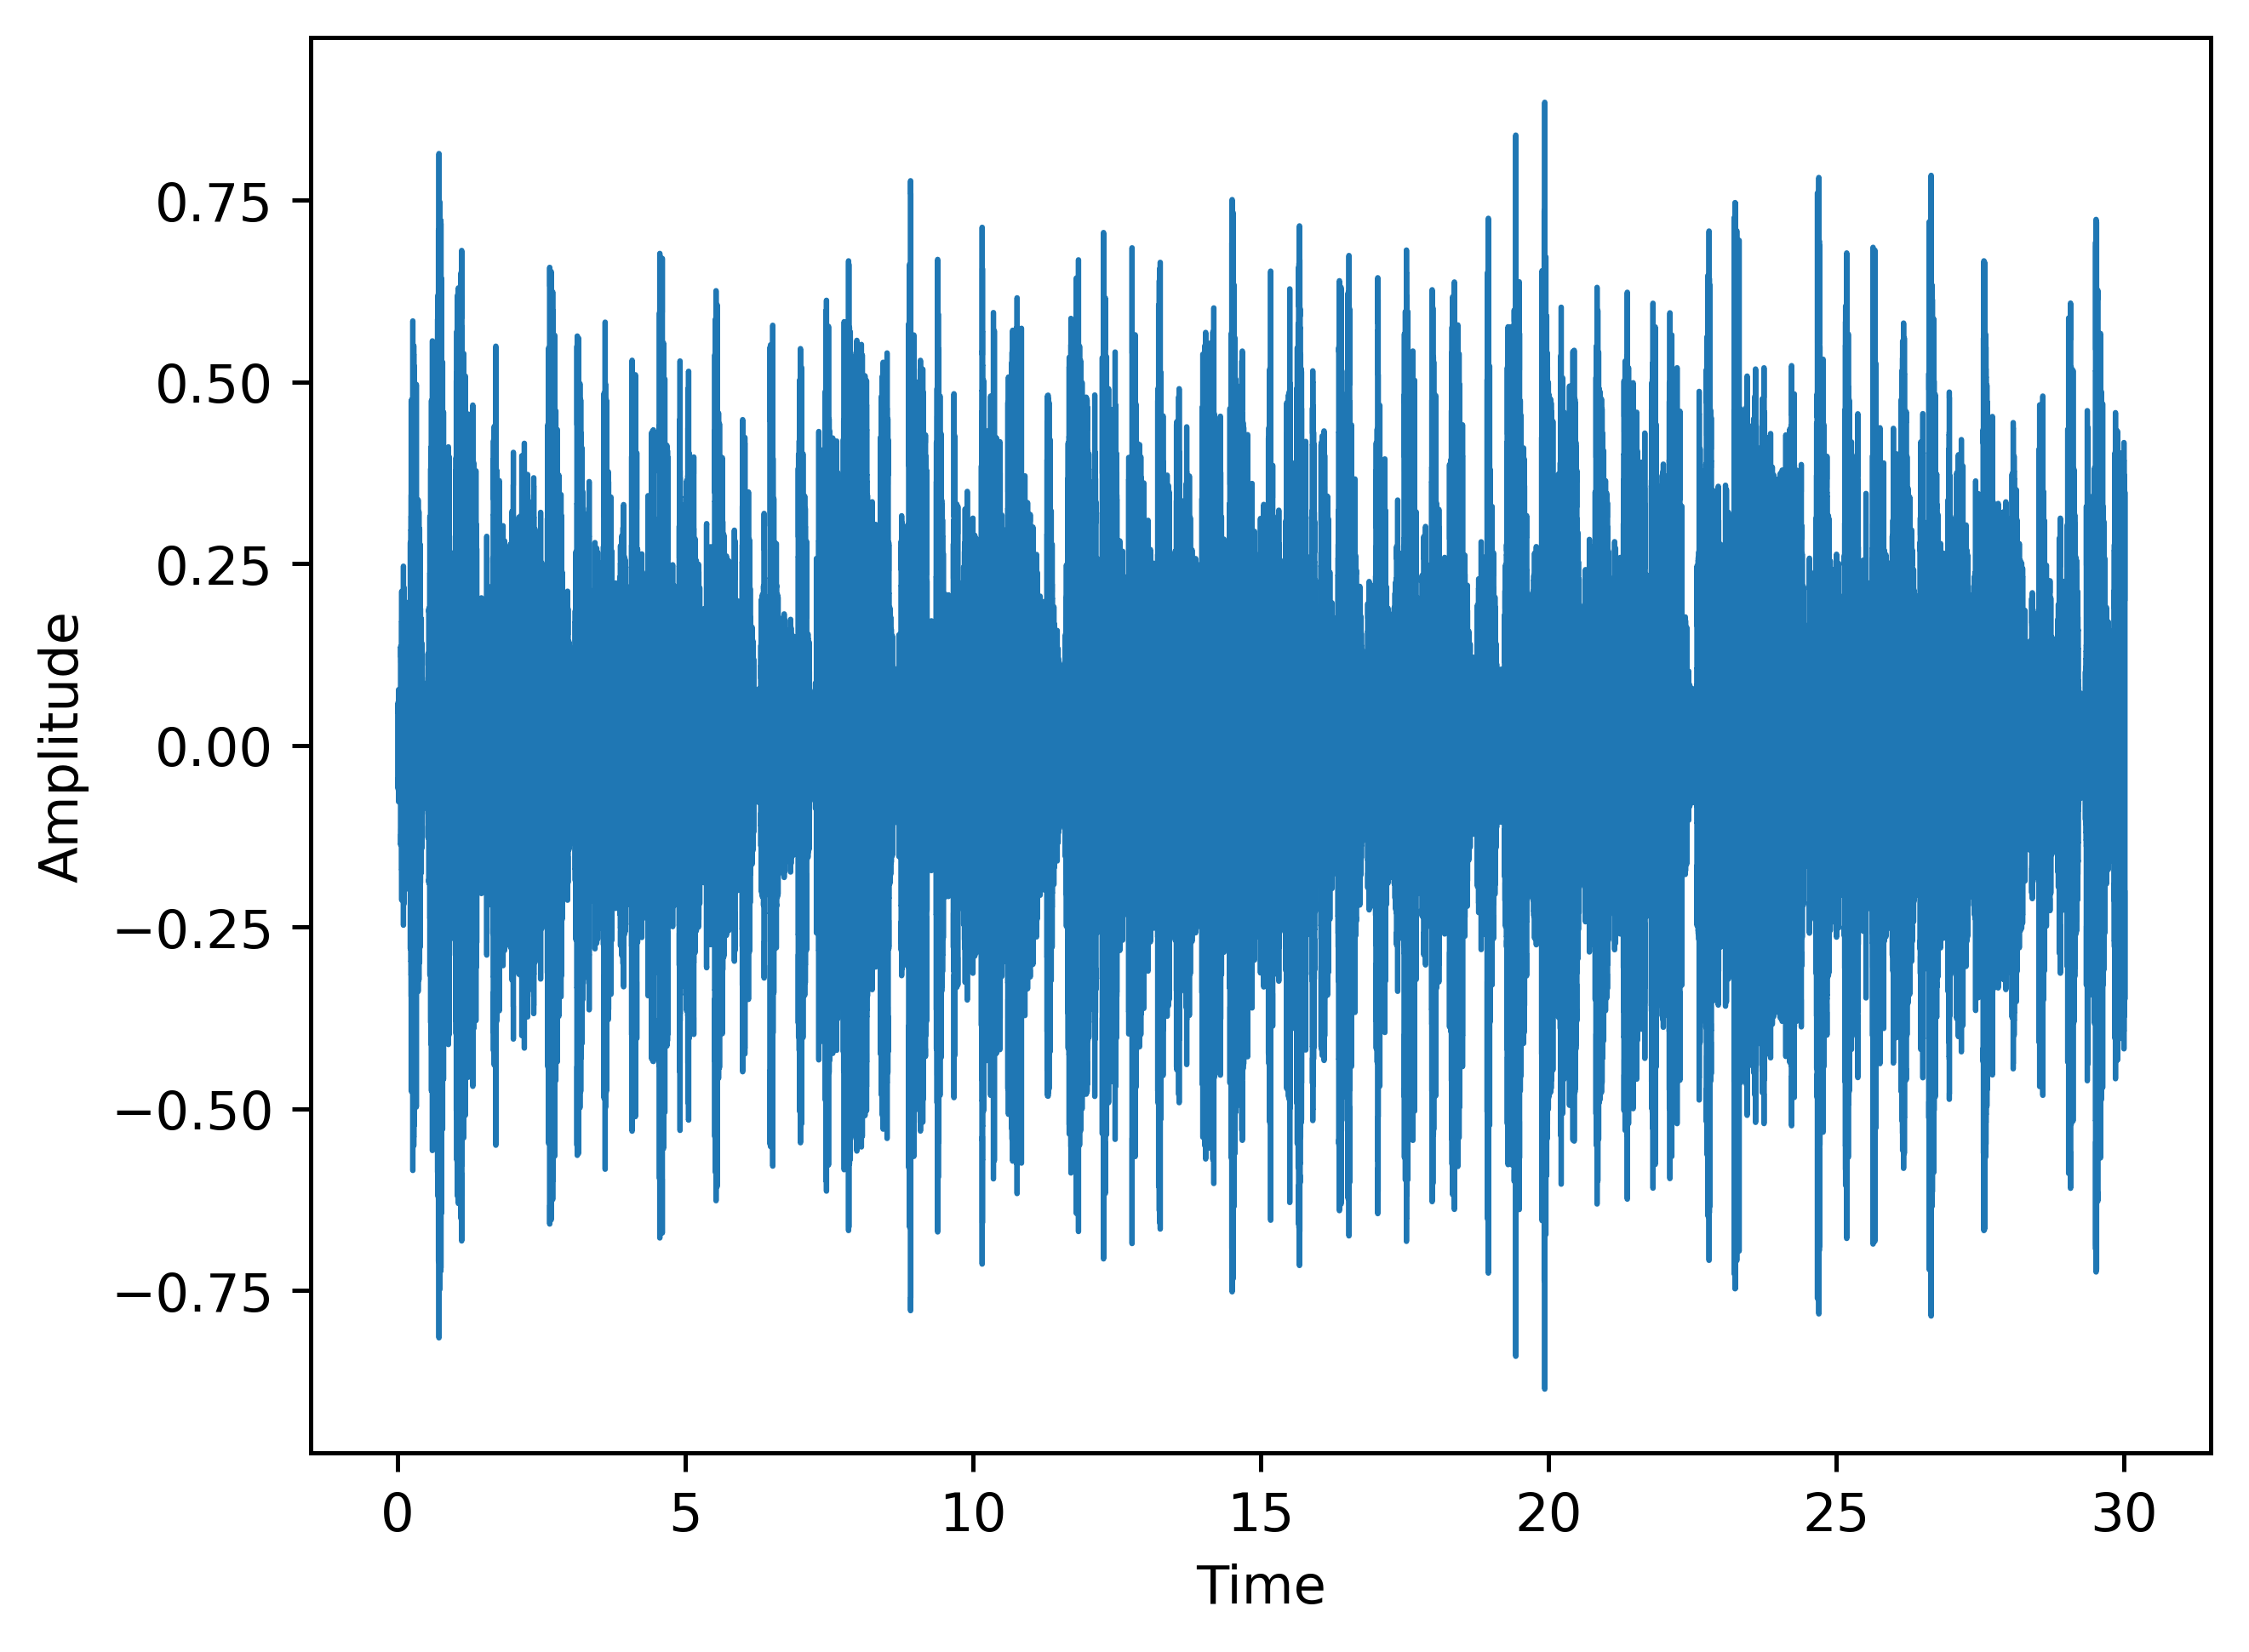

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file = "res/blues.00000.wav"

# waveform
signal, sr = librosa.load(file, sr=22050) # sr * T -> 22050 *30
plt.figure(dpi=450)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()



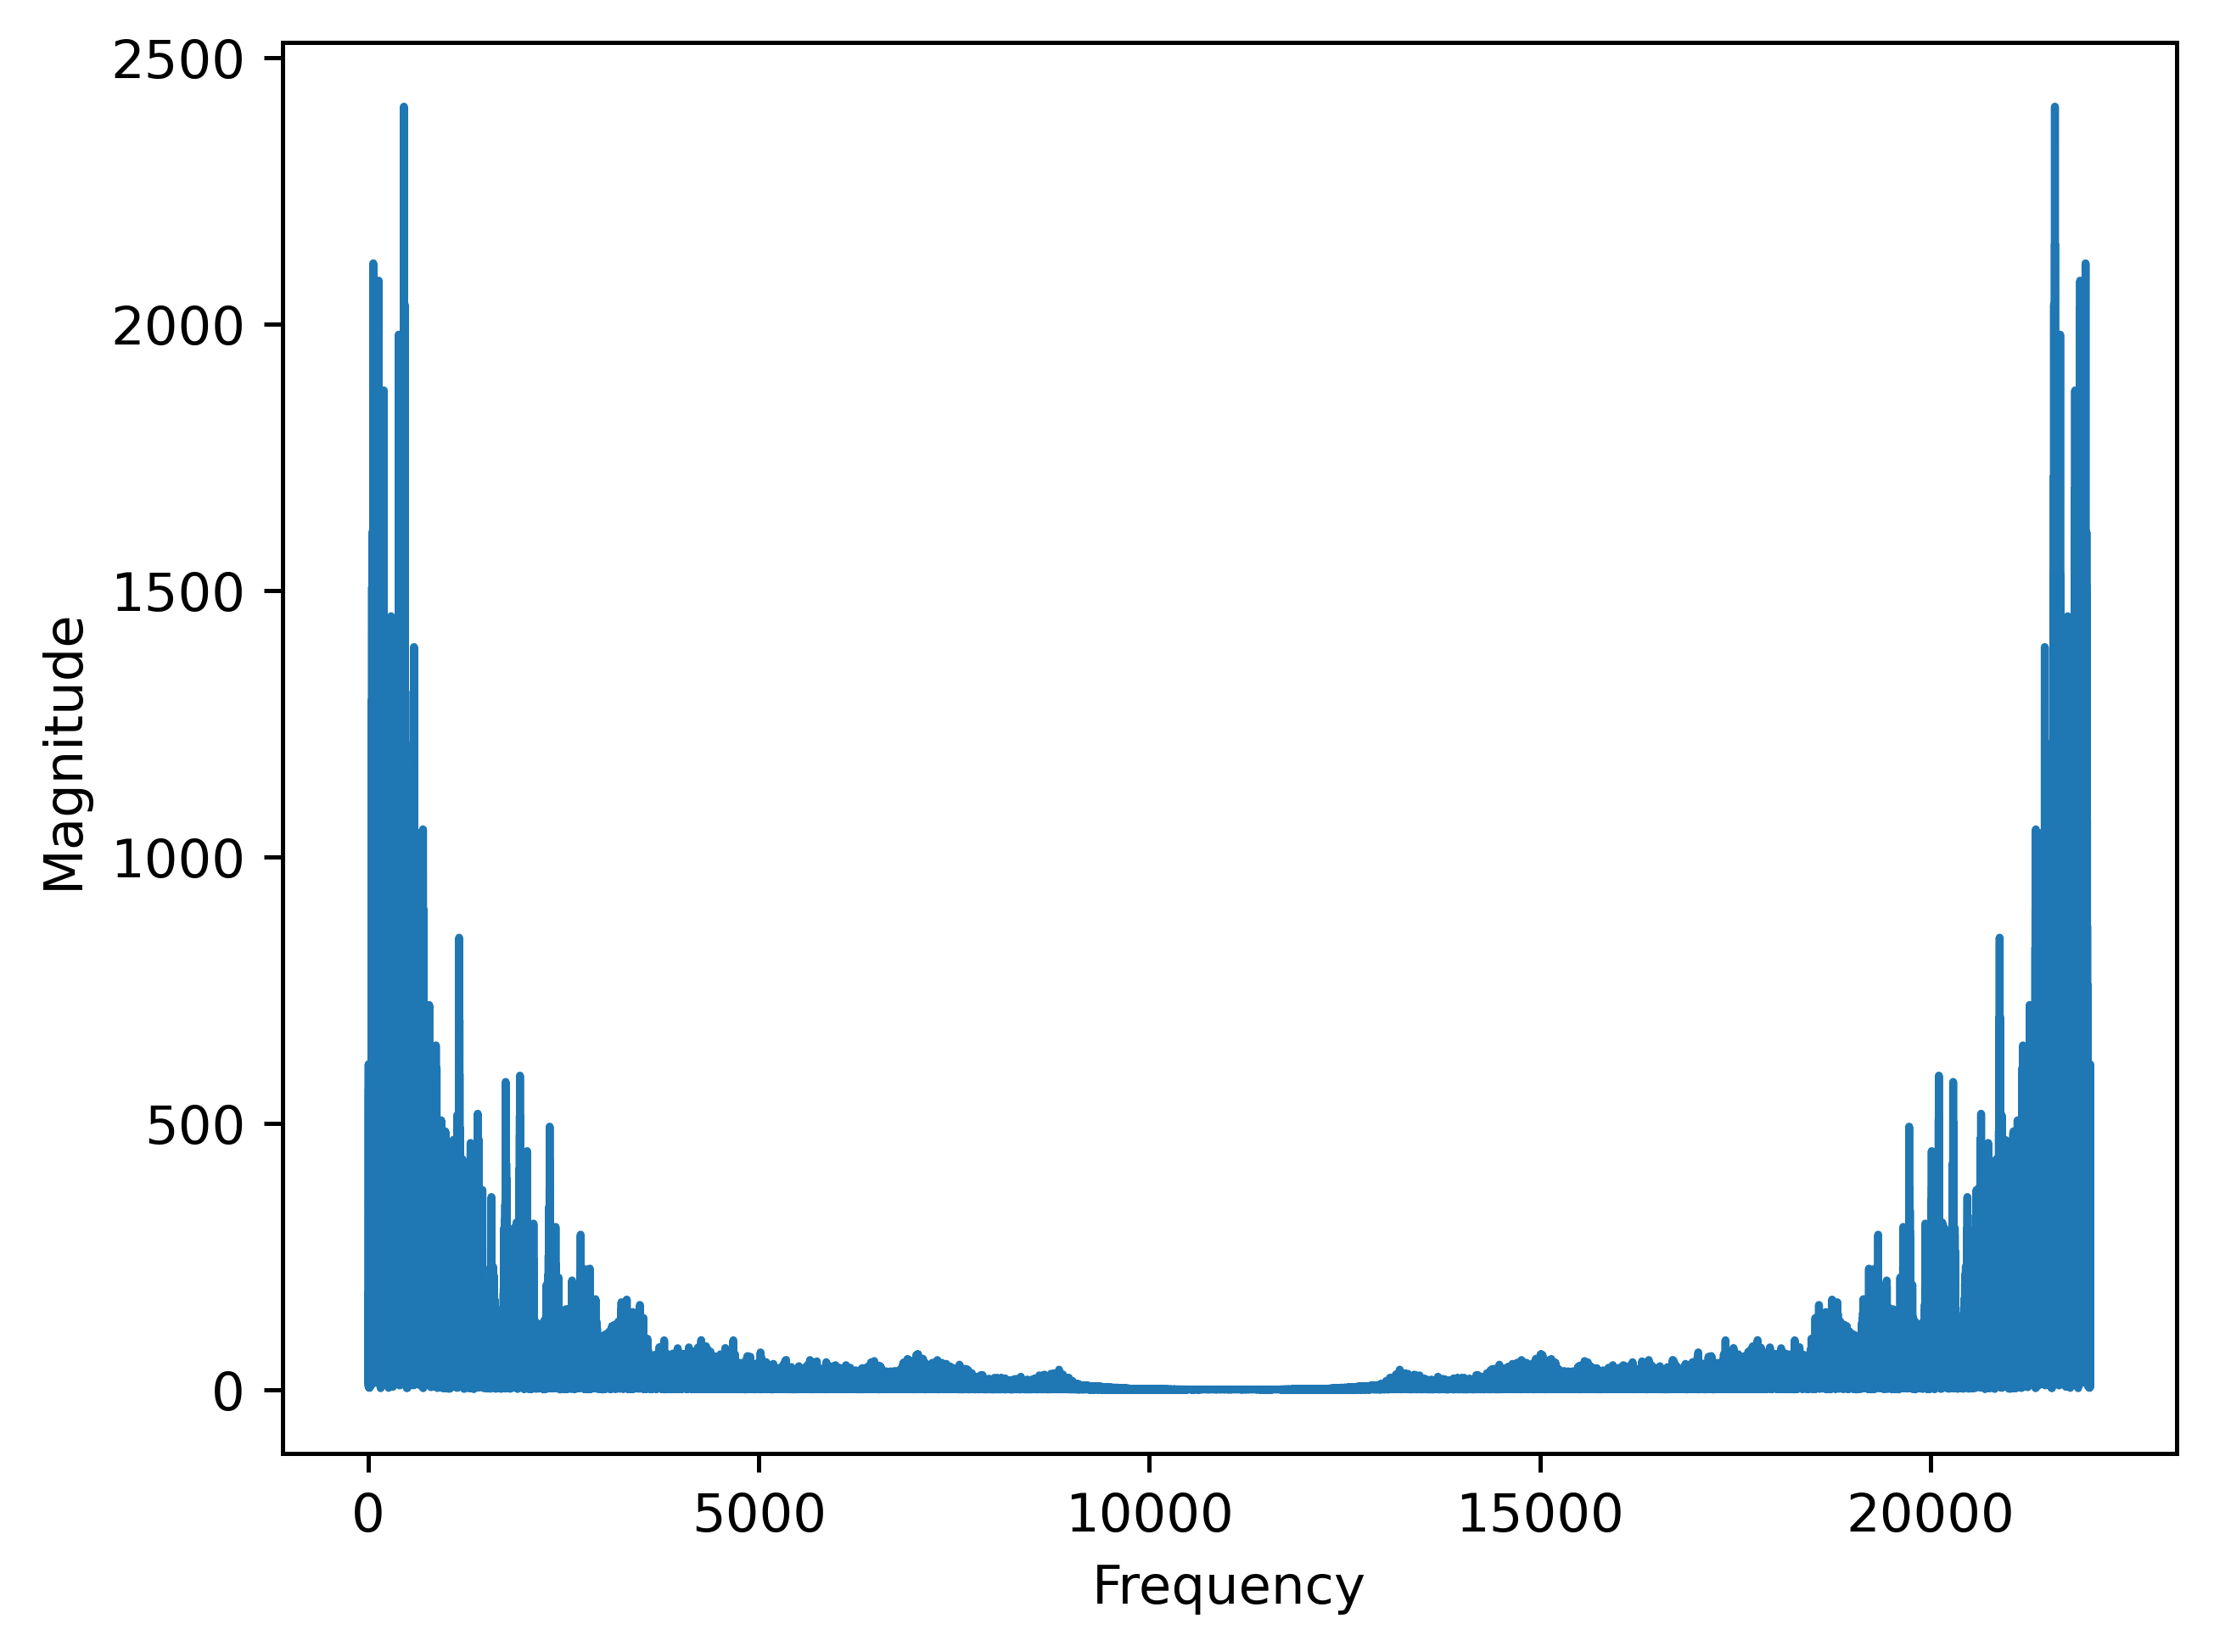

In [2]:
import numpy as np

# fft -> spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
plt.figure(dpi=450)
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()



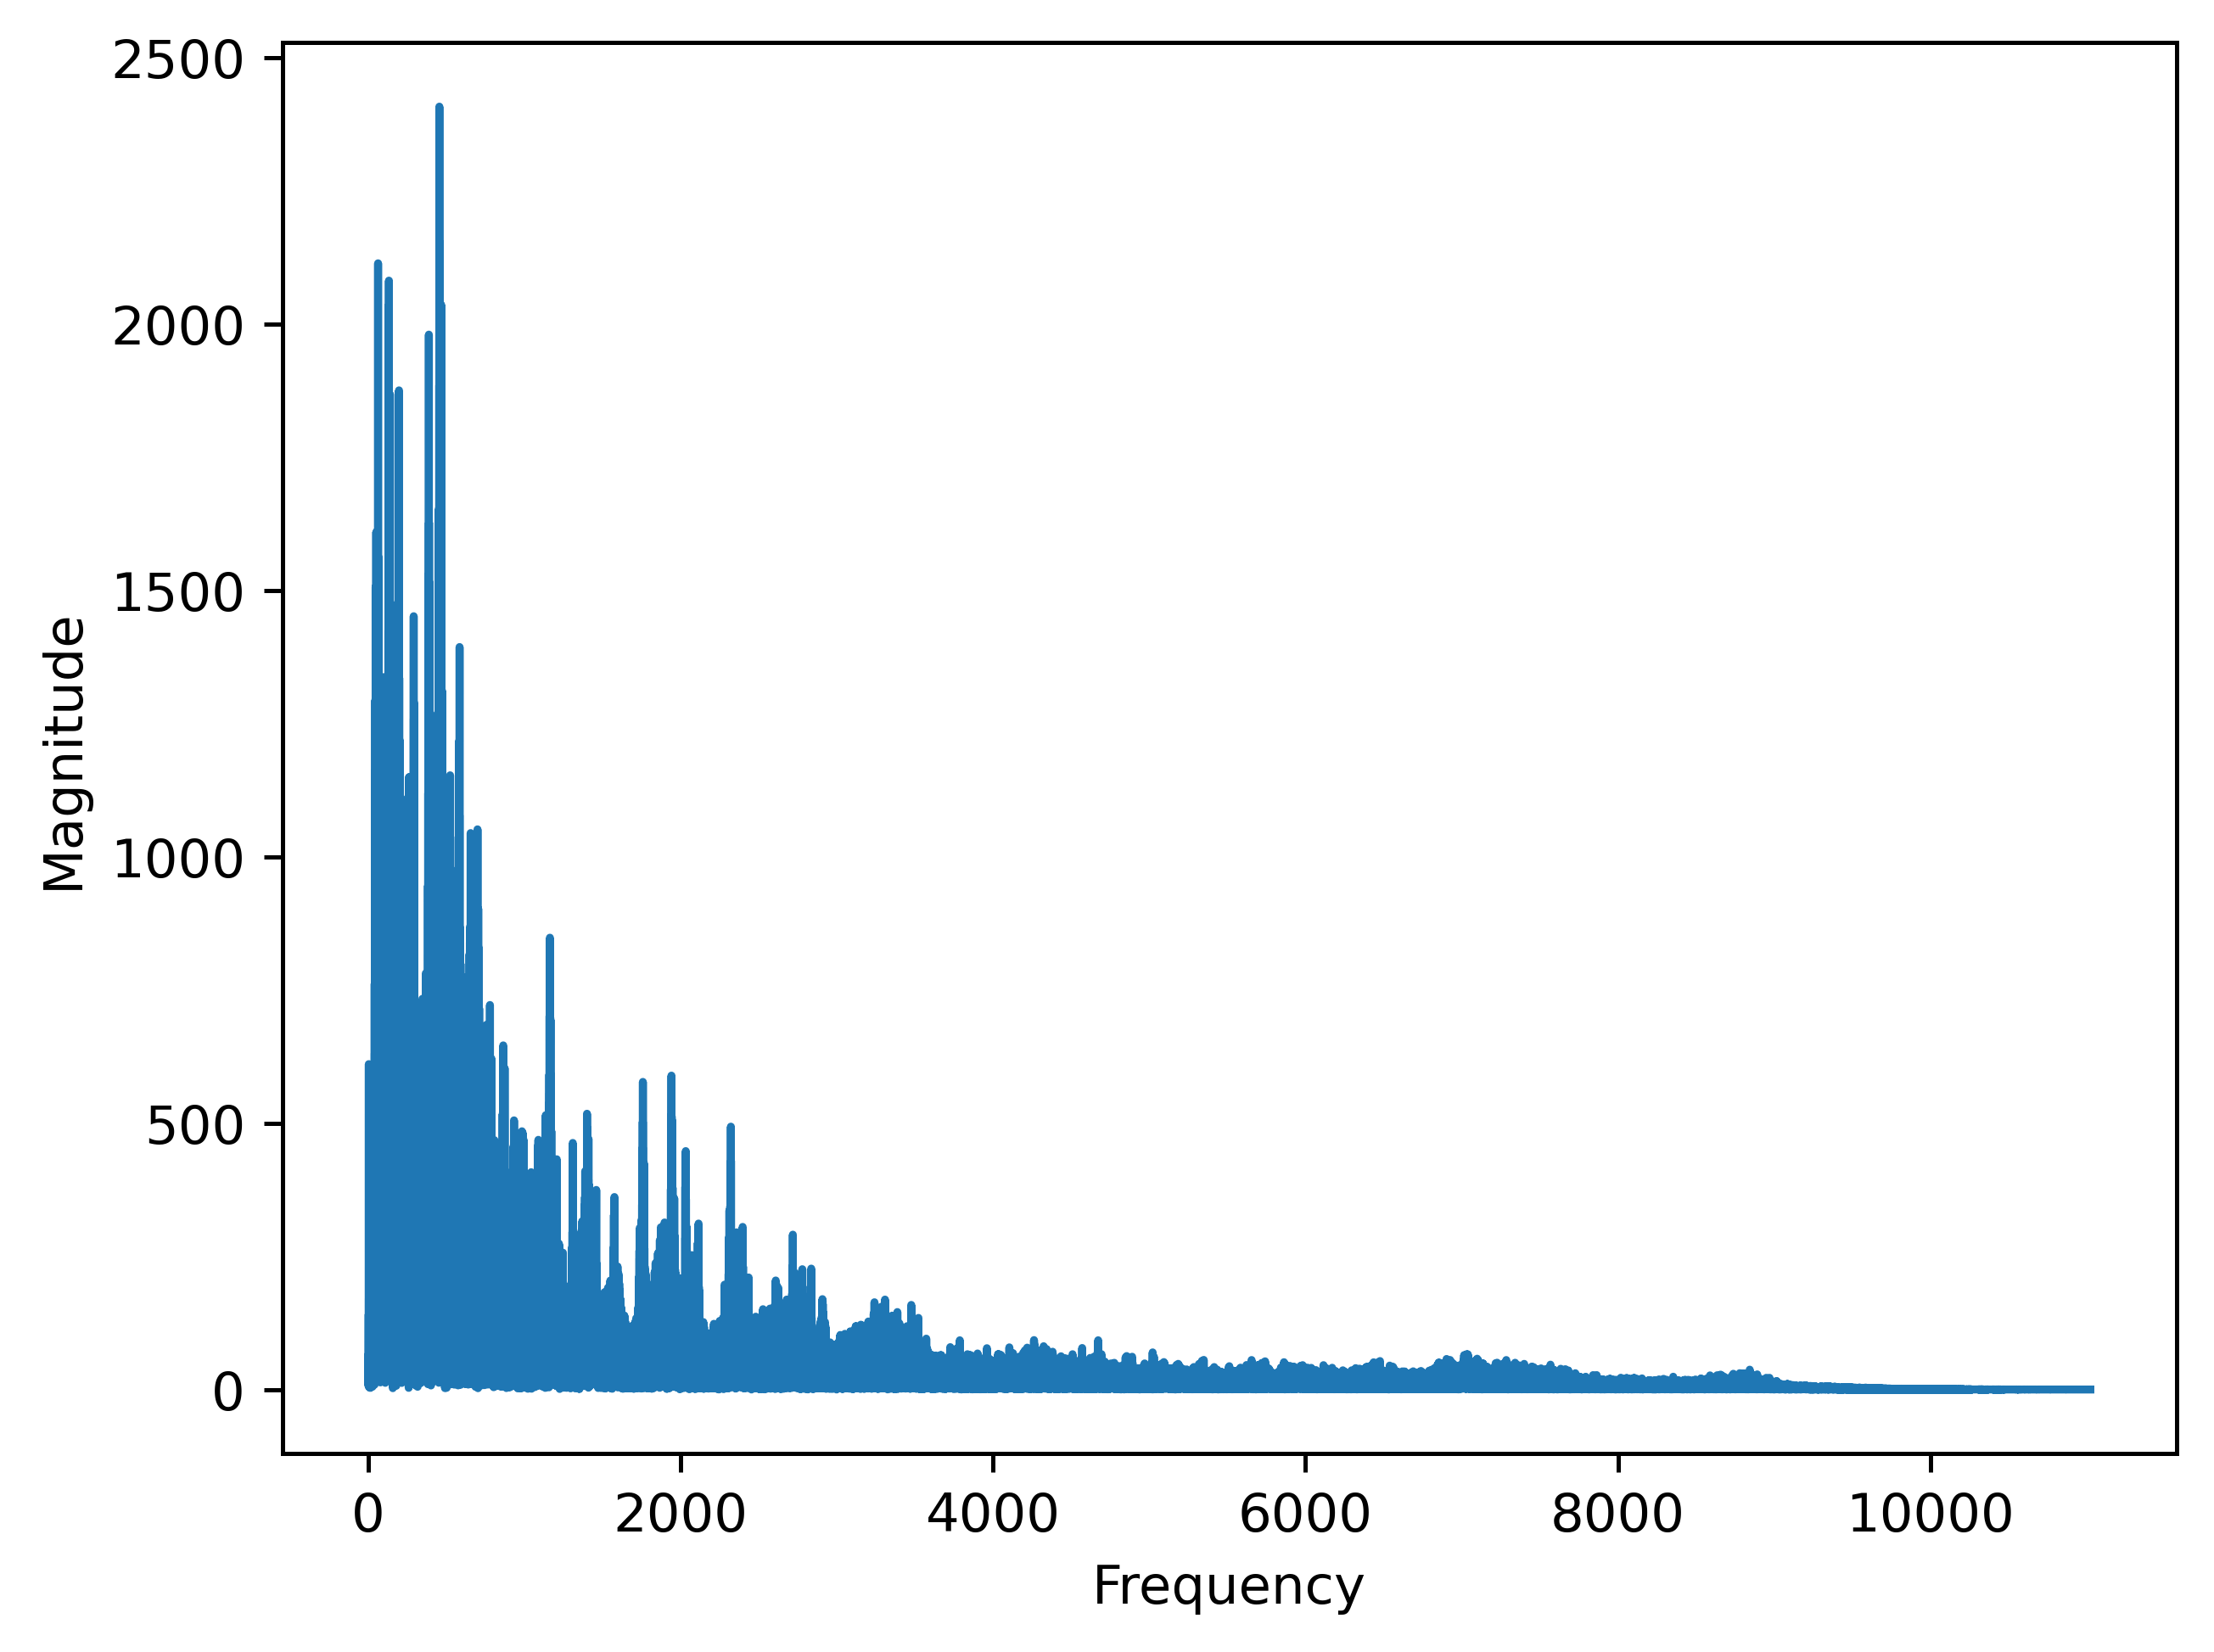

In [3]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.figure(dpi=450)
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


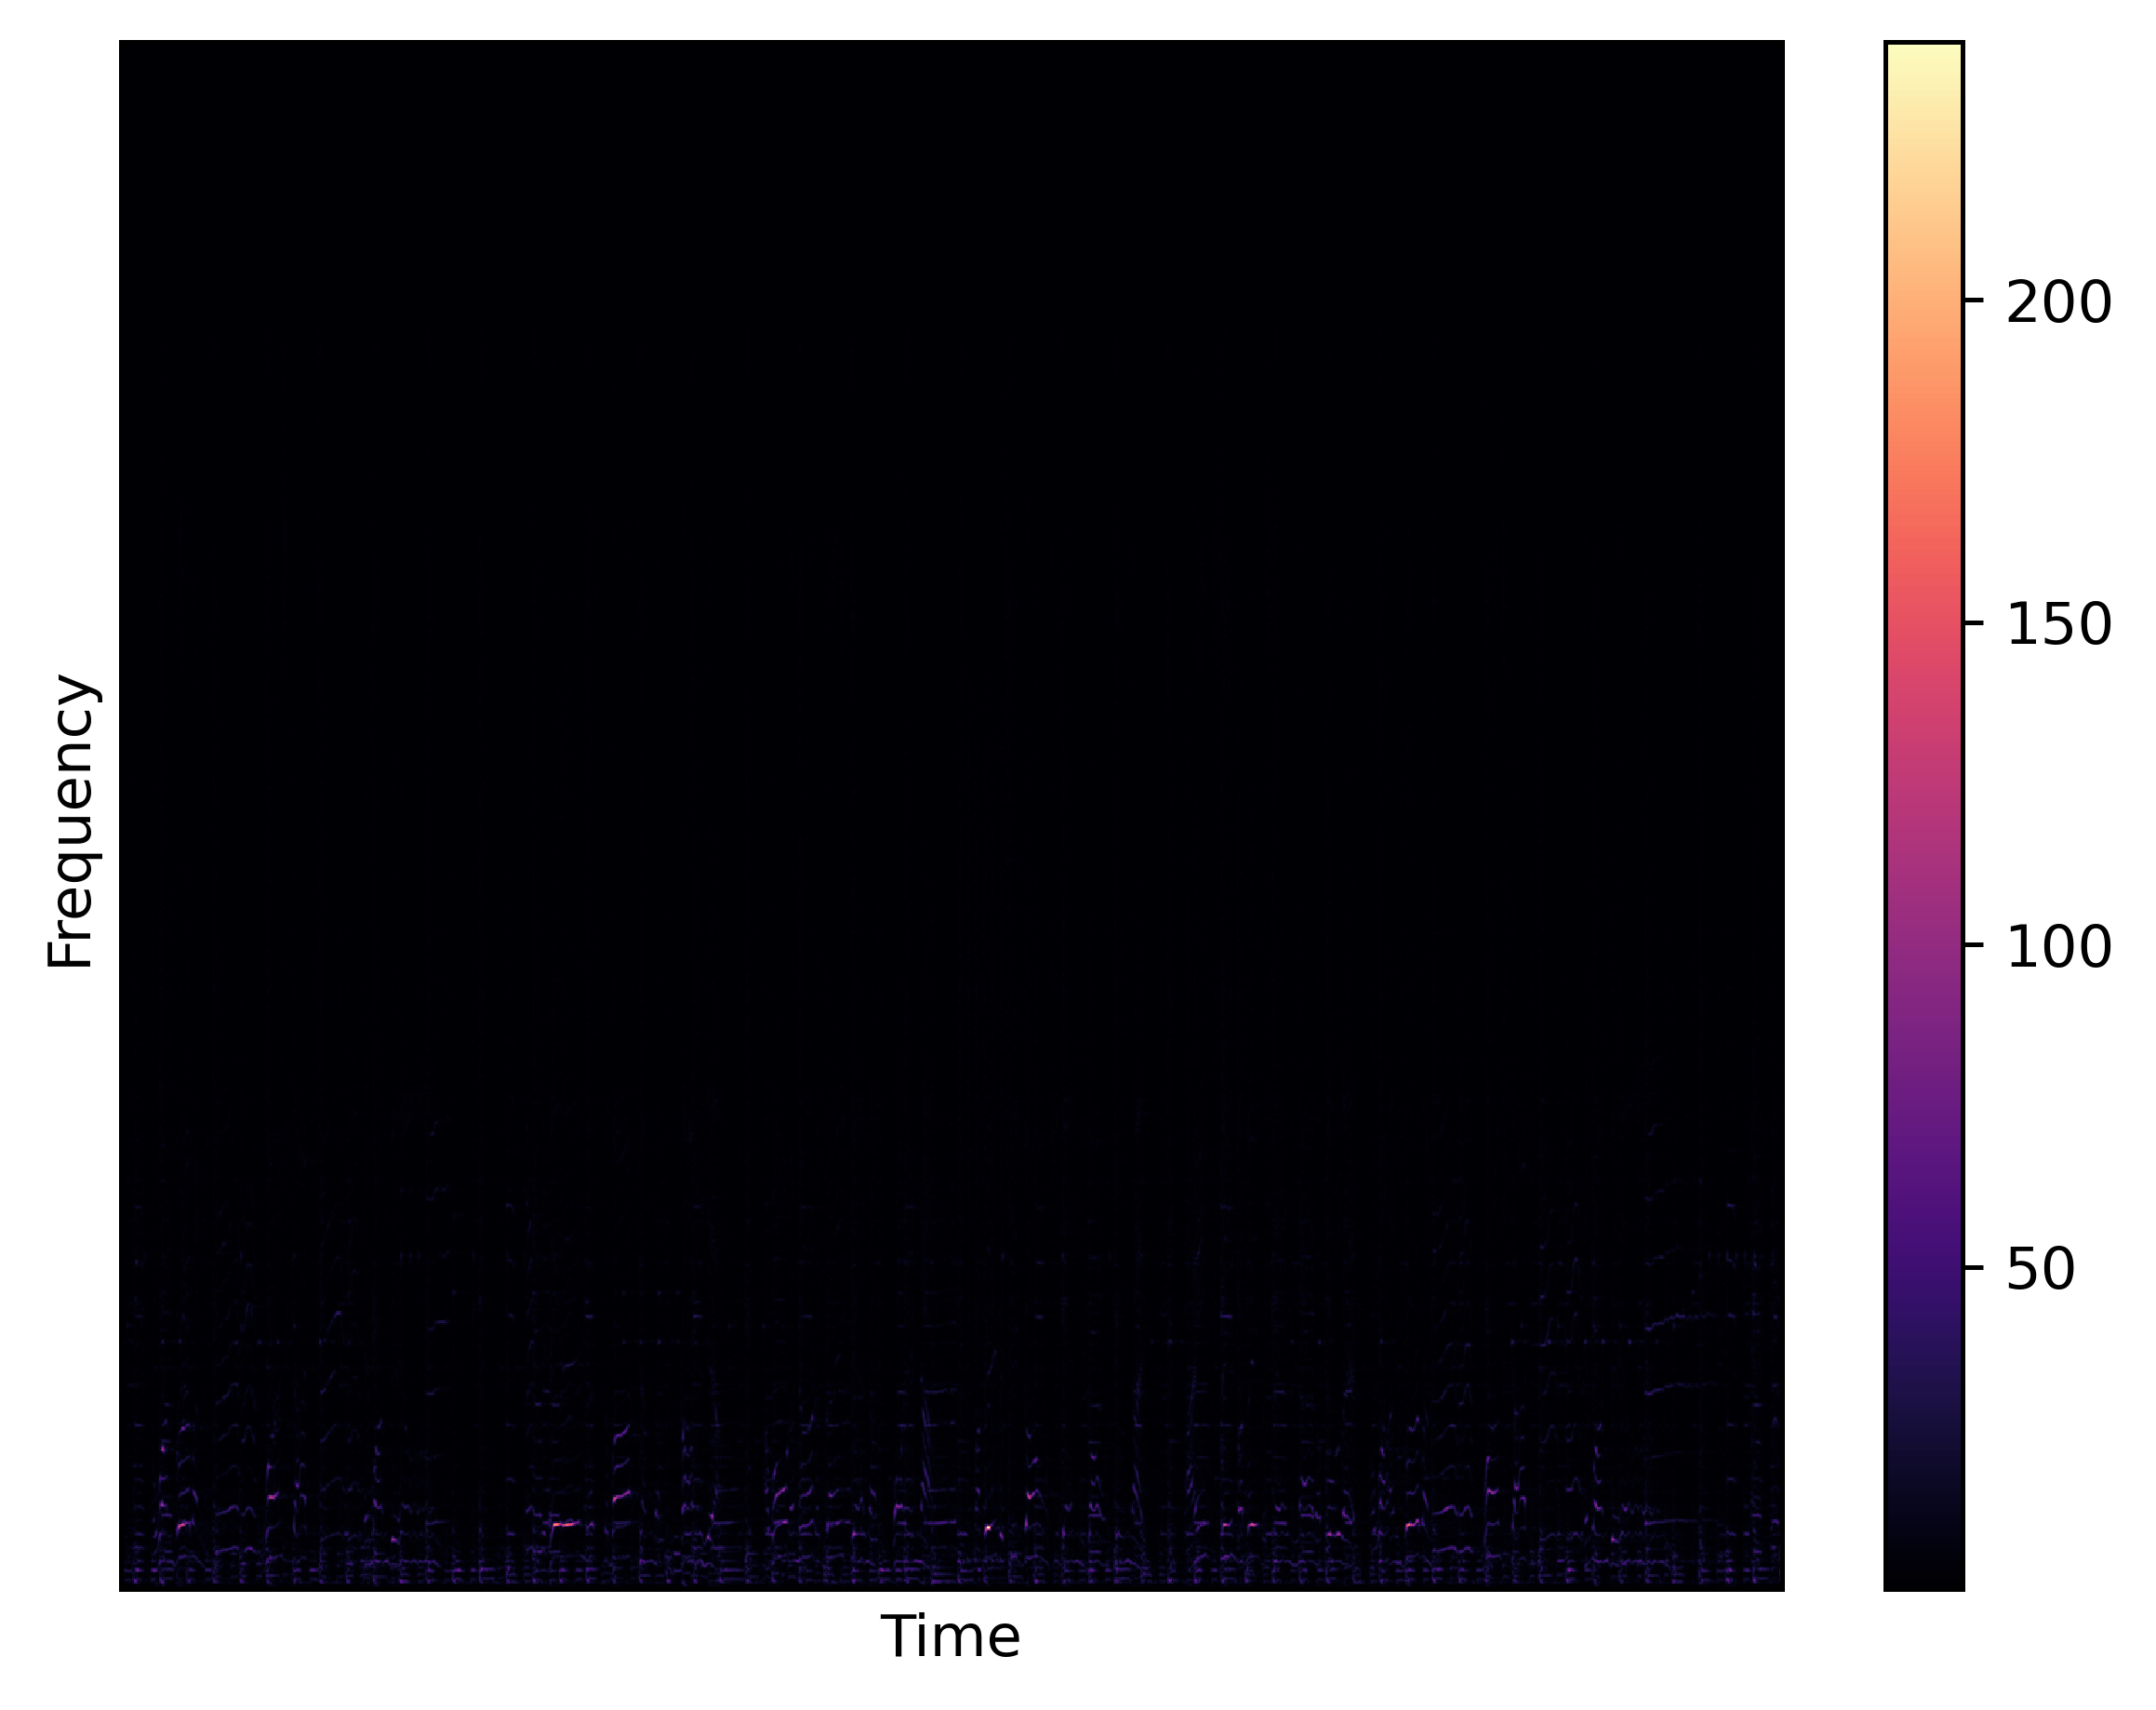

In [4]:
# stft -> spectrogram

n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

plt.figure(dpi=450)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


In [5]:
spectrogram

array([[2.6364236e+00, 2.6678083e+00, 2.5365872e+00, ..., 3.1094050e+00,
        2.3183353e-01, 9.8383055e+00],
       [2.2134790e+00, 1.1041645e+00, 1.3170586e+00, ..., 2.2173395e+00,
        4.3237038e+00, 1.0822420e+01],
       [1.9721121e+00, 4.4013327e-01, 7.2689354e-01, ..., 1.5073123e+00,
        1.5358019e+00, 1.2419467e+01],
       ...,
       [4.4399890e-04, 2.7590495e-04, 2.0796218e-04, ..., 2.6868799e-04,
        2.6135079e-03, 2.0509046e-02],
       [2.9120274e-04, 6.7083507e-05, 1.5667807e-04, ..., 1.8944546e-04,
        3.2300667e-03, 2.0803902e-02],
       [2.5671721e-04, 8.1572252e-05, 1.0778356e-04, ..., 4.0281515e-04,
        2.4298967e-03, 2.0538479e-02]], dtype=float32)

In [6]:
spectrogram.shape

(1025, 1293)

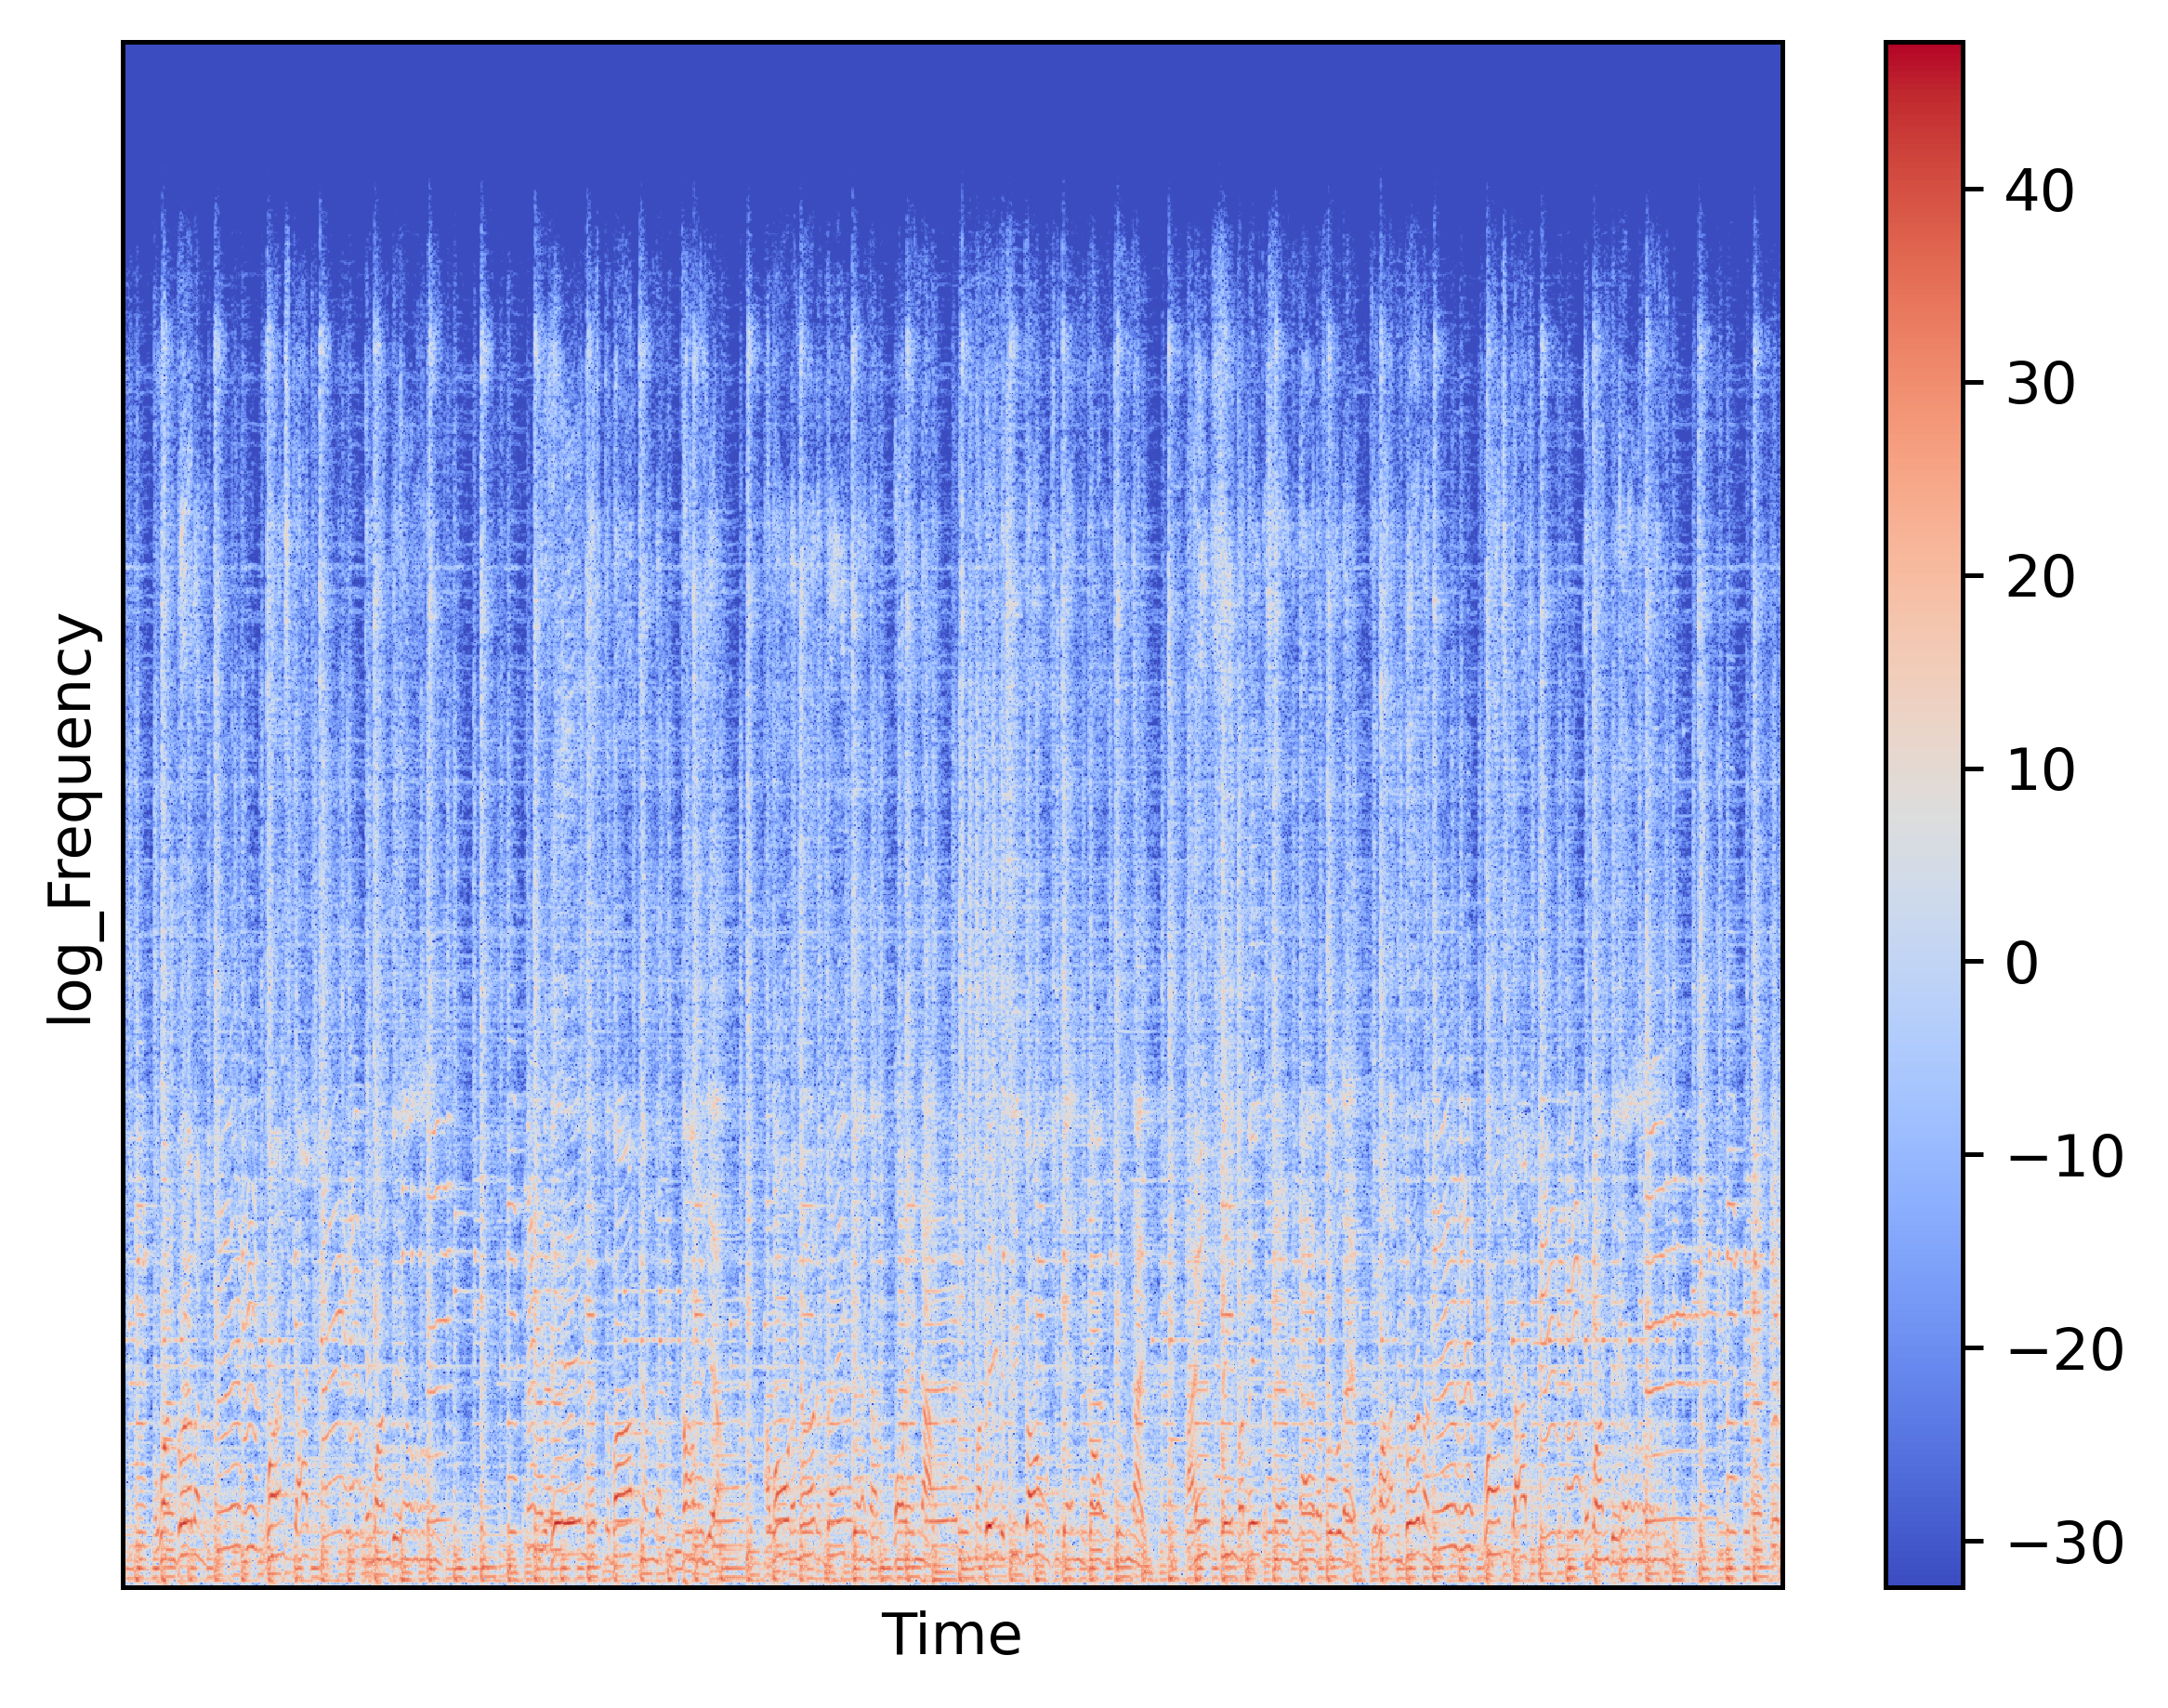

In [7]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(dpi=450)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("log_Frequency")
plt.colorbar()
plt.show()

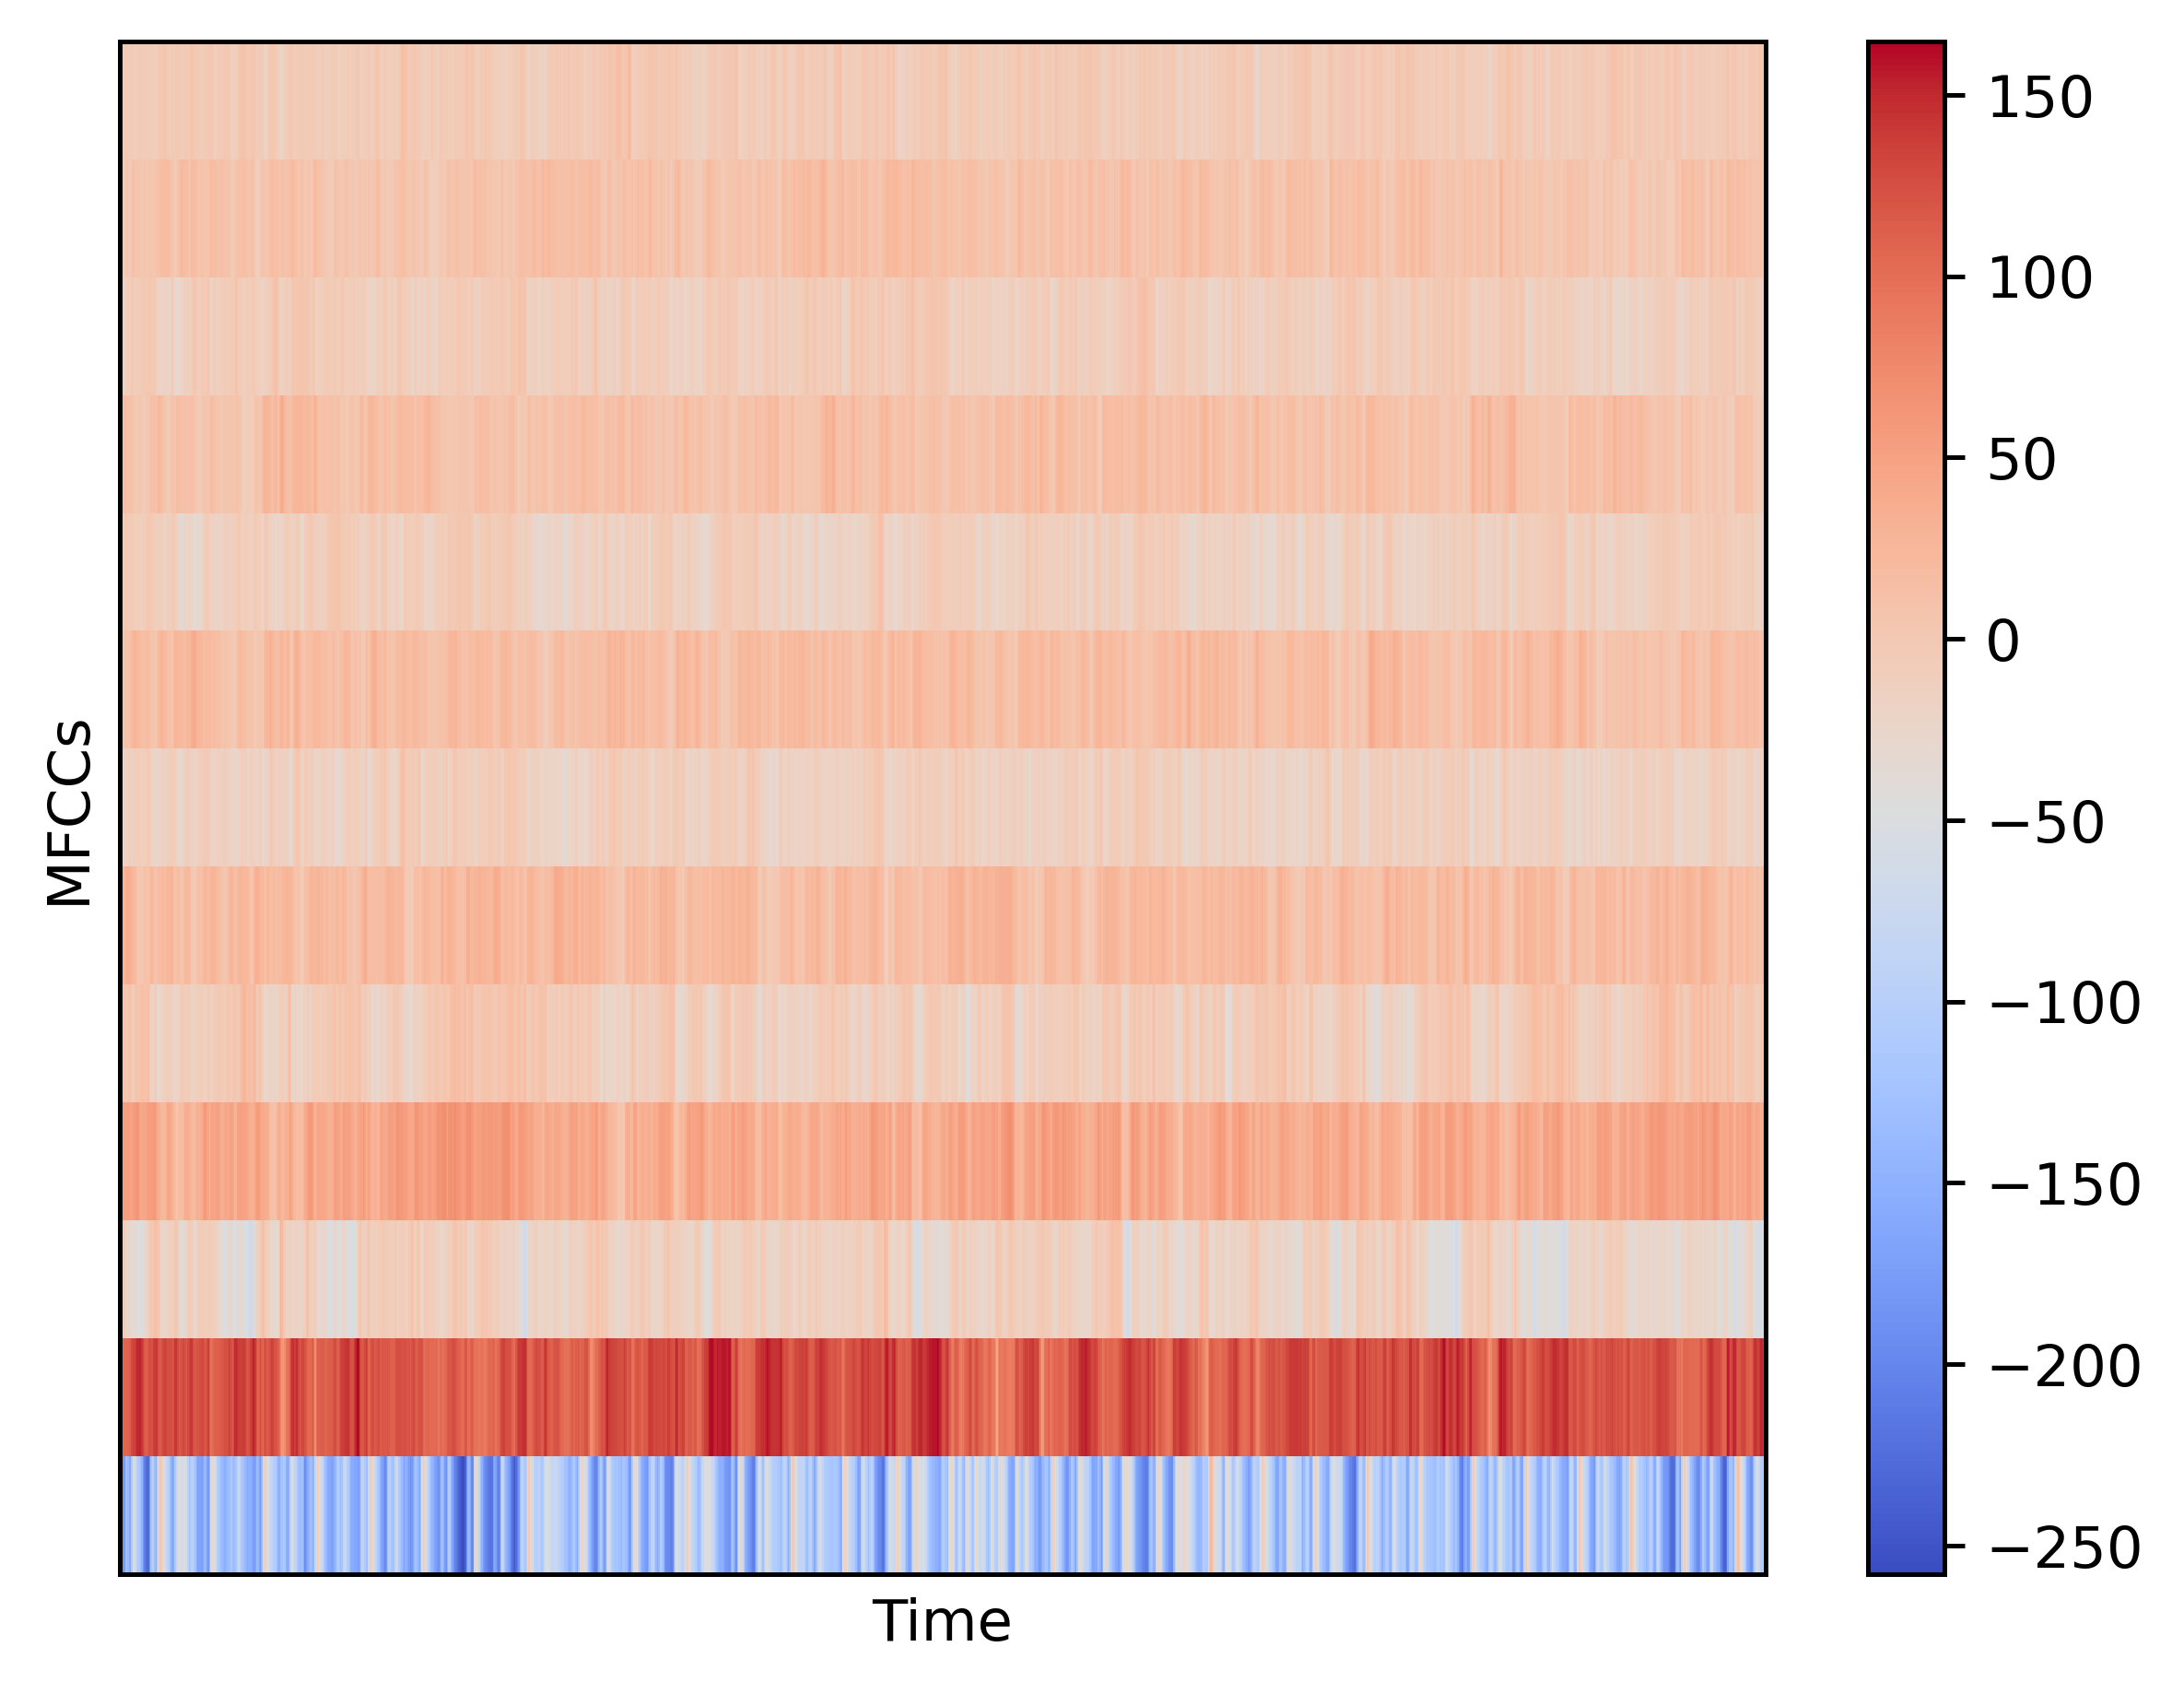

In [12]:
# MFCCs
MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure(dpi=450)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.colorbar()
plt.show()

In [9]:
help(librosa.feature.mfcc)

Help on function mfcc in module librosa.feature.spectral:

mfcc(*, y: Optional[numpy.ndarray] = None, sr: float = 22050, S: Optional[numpy.ndarray] = None, n_mfcc: int = 20, dct_type: int = 2, norm: Optional[str] = 'ortho', lifter: float = 0, **kwargs: Any) -> numpy.ndarray
    Mel-frequency cepstral coefficients (MFCCs)
    
    .. warning:: If multi-channel audio input ``y`` is provided, the MFCC
        calculation will depend on the peak loudness (in decibels) across
        all channels.  The result may differ from independent MFCC calculation
        of each channel.
    
    Parameters
    ----------
    y : np.ndarray [shape=(..., n,)] or None
        audio time series. Multi-channel is supported..
    sr : number > 0 [scalar]
        sampling rate of ``y``
    S : np.ndarray [shape=(..., d, t)] or None
        log-power Mel spectrogram
    n_mfcc : int > 0 [scalar]
        number of MFCCs to return
    dct_type : {1, 2, 3}
        Discrete cosine transform (DCT) type.
        